## Zomato Time taken  delivery Prediction

### Introduction About the Data :

**The dataset**  the goal of the dataset, which is to predict the Time_taken for a given delivery using (Regression Analysis).

There are 19 independent variables (including `id`):

* `id` : unique identifier of each Zomato record or item in the dataset.

* `Delivery_person_ID` : Delivery_person_ID refers to the unique ID that the delivery person gets when they receive an order from Zomato.

* `Delivery_person_Age` : Delivery person age refers to the age of the person who is delivering the order 

* `Delivery_person_Ratings` : Delivery person Ratings refers to the Ratings  of the person who is delivering the order

* `Restaurant_latitude` : Restaurant latitude refers to the latitude of the location of the restaurant where the order is placed.

* `Restaurant_longitude` : Restaurant longitude refers to the longitude  of the location of the restaurant where the order is placed.


* `Delivery_location_latitude` : Delivery location latitude refers to the latitude of the location where the order is being delivered.

* `Delivery_location_longitude	` :  Delivery location longitude refers to the longitude of the location where the order is being delivered.

* `Order_Date` : Order Date" refers to the date when the order was placed.

* `Time_Orderd` : Time Ordered refers to the time when the order was placed

* `Time_Order_picked` : Time Order Picked refers to the time when the delivery person picked up the order from the restaurant.

* `Weather_conditions` : Weather Conditions refers to the atmospheric conditions at the time of delivery.

* `Road_traffic_density` : Road traffic density refers to the amount of traffic on the road at the time of delivery, which can affect the delivery time.

* `Vehicle_condition` : Vehicle condition refers to the state of the delivery vehicle, such as its maintenance, fuel level, and cleanliness

* `Type_of_order` : Type of order refers to the categorization of orders based on their attributes, such as the type of cuisine, the size of the order, and the delivery method

* `Type_of_vehicle` : Type of vehicle refers to the type of vehicle used for the delivery.


* `multiple_deliveries` : Multiple deliveries refers to the situation where a delivery person has to deliver multiple orders at the same time or in quick succession.

* `Festival` : Festival refers to whether there is a festival or not during the time of delivery

* `City` : City refers to the city where the order is placed.

Target variable:

* `Time_taken (min)` : Time_taken (min) refers to the time taken to deliver the order from the restaurant to the delivery location.


Dataset Source Link :
[https://drive.google.com/file/d/1tr1ozeDCuE9AvoL0D7l00hjfl-k83Yab/view](https://drive.google.com/file/d/1tr1ozeDCuE9AvoL0D7l00hjfl-k83Yab/view)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Data Ingestions step
df=pd.read_csv('data/finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [5]:
### Yes missing values present in the data
#lists of missing values Column name
null_cols = df.columns[df.isnull().any()].tolist()
null_cols

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather_conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [7]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [8]:
## Lets drop the id column
df=df.drop(labels=['ID'],axis=1)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [9]:
## check for duplicated records
df.duplicated().sum()

0

In [10]:
## Splitting the  numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('\n Categorical Columns:',categorical_columns)

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

 Categorical Columns: Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [11]:
df[categorical_columns].describe()

,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,1320,44,176,193,6,4,4,4,2,3
top,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [12]:
i = 0
while i < len(categorical_columns):
    print(categorical_columns[i],'=',df[categorical_columns[i]].value_counts(),'\n' )
    i += 1



Delivery_person_ID = Delivery_person_ID
JAPRES11DEL02     67
PUNERES01DEL01    67
VADRES11DEL02     66
VADRES08DEL02     66
JAPRES03DEL01     66
                  ..
GOARES01DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64 

Order_Date = Order_Date
15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022     970
18-03-2022     968
31-03-2022     967
27-03-2022     965
08-03-2022     964
12-03-2022     964
23-03-2022     96

In [13]:
df['Time_Orderd'].value_counts()

Time_Orderd
21:55          461
17:55          456
0.833333333    449
22:20          448
21:35          446
              ... 
14:30           57
14:15           56
0.666666667     53
13:20           52
16:30           51
Name: count, Length: 176, dtype: int64

In [14]:
df1=df.drop("Delivery_person_ID",axis=1)

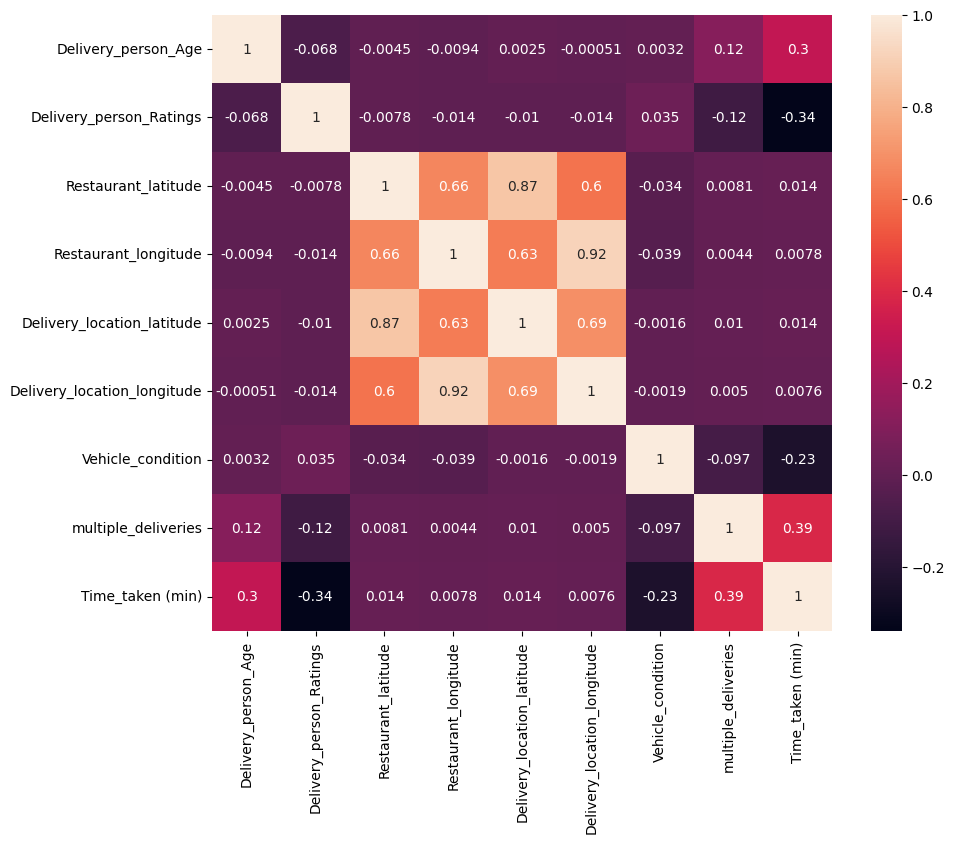

In [15]:
# To analyze the data, we should compute the correlation of the numerical columns.

# Select only numerical columns
numerical_columns = df1.select_dtypes(include=[np.number])

# Set figure size
plt.figure(figsize=(10, 8))

# Compute the correlation heatmap
sns.heatmap(numerical_columns.corr(), annot=True)

# Save the plot
plt.savefig('correlation_plot.png')




In [16]:
-0.38*100


-38.0

In [17]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [35]:
for i in categorical_columns:
    print(i,"=",df[i].unique(),'\n\n')

Delivery_person_ID = ['DEHRES17DEL01' 'KOCRES16DEL01' 'PUNERES13DEL03' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03'] 


Order_Date = ['12-02-2022' '13-02-2022' '04-03-2022' '14-02-2022' '02-04-2022'
 '01-03-2022' '16-03-2022' '20-03-2022' '15-02-2022' '10-03-2022'
 '11-03-2022' '27-03-2022' '26-03-2022' '05-04-2022' '12-03-2022'
 '01-04-2022' '05-03-2022' '11-02-2022' '08-03-2022' '03-04-2022'
 '30-03-2022' '28-03-2022' '18-03-2022' '14-03-2022' '06-04-2022'
 '04-04-2022' '24-03-2022' '19-03-2022' '09-03-2022' '25-03-2022'
 '02-03-2022' '13-03-2022' '29-03-2022' '31-03-2022' '17-03-2022'
 '07-03-2022' '15-03-2022' '16-02-2022' '03-03-2022' '18-02-2022'
 '23-03-2022' '17-02-2022' '06-03-2022' '21-03-2022'] 


Time_Orderd = ['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '20:40' '21:15'
 '20:20' '22:30' '08:15' '19:30' '12:25' '18:35' '20:35' '23:20' '21:20'
 '23:35' '22:35' '23:25' '13:35' '21:35' '18:55' '14:15' '0.458333333'
 '09:45' '08:40' '0.958333333' '17:25' nan 

In [34]:
categorical_columns

Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')